<a href="https://colab.research.google.com/github/sensei-jirving/Online-DS-PT-01.24.22-cohort-notes/blob/main/Week_08/Lecture_01/Challenge/Solution_Challenge_Logistic_Regression_and_ROCAUC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load in Data
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Exercises/2 - DS Machine Learning/DS Machine Learning-Week 3/cancer.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Look at info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Check class balance numbers
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
# Check class balance percentages
df['diagnosis'].value_counts(normalize=True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [ ]:
# Define X features and y target
X = df.drop(columns = ['diagnosis', 'id'])
y = df['diagnosis']

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =42, stratify = y)

In [ ]:
# Instantiate standard scaler
scaler = StandardScaler()

# Baseline Model

In [ ]:
# instantiate dummy classifier, pipeline and fit pipeline
dummy = DummyClassifier(strategy = 'stratified', random_state=42)

dummy_pipe = make_pipeline(scaler, dummy)

dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('dummyclassifier',
                 DummyClassifier(random_state=42, strategy='stratified'))])

In [ ]:
# Define a function that takes in arguments and prints out a classification report, confusion matrix and ROC AUC
def evaluate_classification(logreg_pipe,X_test,y_test,cmap='Greens',
                            normalize='true',classes=None,figsize=(20,5)):
    test_preds = logreg_pipe.predict(X_test)
    print(metrics.classification_report(y_test, test_preds,target_names=classes))
    
    fig,ax = plt.subplots(ncols=3,figsize=figsize)
    ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_test, y_test, cmap=cmap, 
                                 display_labels=classes,
                                 ax=ax[0])
    
    ConfusionMatrixDisplay.from_estimator(logreg_pipe, X_test, y_test, cmap=cmap, 
                                 display_labels=classes,normalize='true',
                                 ax=ax[1])
    curve = metrics.plot_roc_curve(logreg_pipe, X_test, y_test, ax=ax[2])
    curve.ax_.grid()
    curve.ax_.plot([0,1],[0,1],ls=':')

              precision    recall  f1-score   support

           B       0.66      0.68      0.67        90
           M       0.42      0.40      0.41        53

    accuracy                           0.57       143
   macro avg       0.54      0.54      0.54       143
weighted avg       0.57      0.57      0.57       143



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


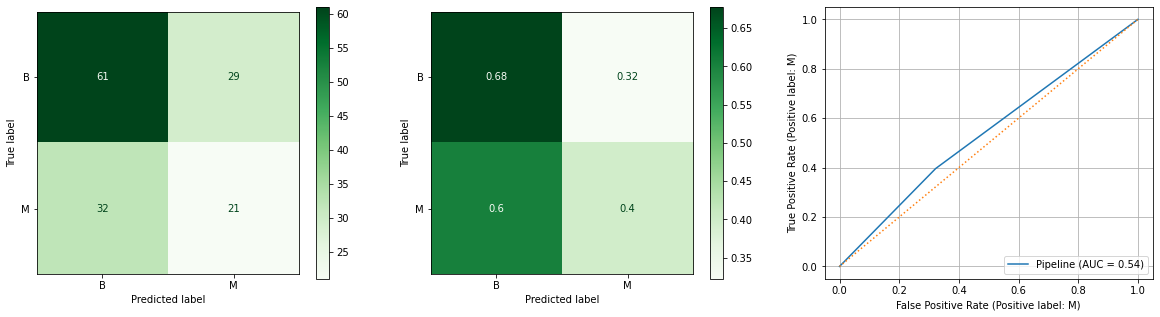

In [ ]:
# Evaluate function on the dummy pipe
evaluate_classification(dummy_pipe, X_test, y_test)

# Logistic Regression Model with class weight balanced

In [ ]:
# Instantiate a logistic regression model using class_weight = 'balanced'
# Make a pipeline with the model
logreg = LogisticRegression(class_weight='balanced')

logreg_pipe = make_pipeline(scaler, logreg)

In [ ]:
# Fit the logistic regression pipe
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [ ]:
# Look at the predictions using .predict()
preds = logreg_pipe.predict(X_test[:5])
preds

array(['M', 'B', 'M', 'B', 'B'], dtype=object)

In [ ]:
# Take a look at the predicted probabilities using .predict_proba
probs = logreg_pipe.predict_proba(X_test[:5])
np.set_printoptions(suppress=True)
probs

array([[0.00029445, 0.99970555],
       [0.99472657, 0.00527343],
       [0.00022414, 0.99977586],
       [0.99999997, 0.00000003],
       [0.95890106, 0.04109894]])

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        90
           M       0.98      0.94      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


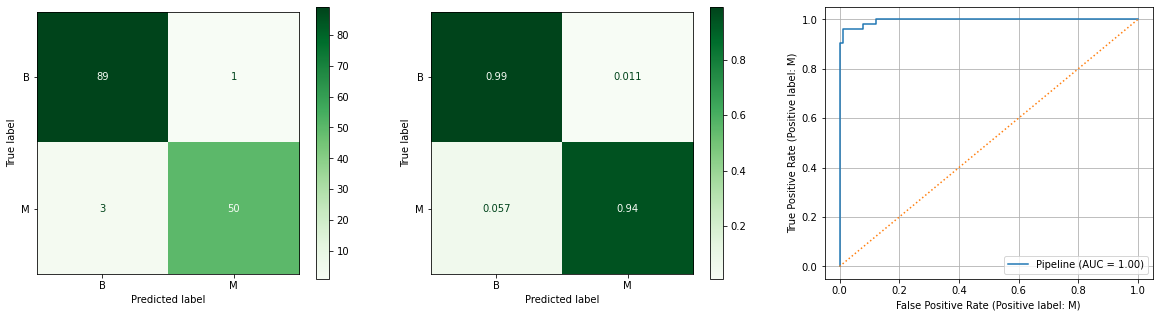

In [ ]:
# Evaluate the logistic regression pipe using function
evaluate_classification(logreg_pipe, X_test, y_test)

# GridSearchCV

In [ ]:
logreg2 = LogisticRegression(max_iter=500)

logreg_pipe2 = make_pipeline(scaler, logreg2)

Sklearn metrics documentation for scoring Gridsearch parameter https://scikit-learn.org/stable/modules/model_evaluation.html

In [ ]:
# Create a paramater grid for GridSearchCV and instantiate object
params = {'logisticregression__C': [0.001,0.01,0.1,1,10,100,1000000,1e12],
          'logisticregression__class_weight': ['balanced', None],
        'logisticregression__penalty':['l1','l2','elasticnet'],
        'logisticregression__solver':["saga"]} #"liblinear", "newton-cg", "lbfgs", "sag",
logreg_grid = GridSearchCV(logreg_pipe2,params,scoring='roc_auc')
logreg_grid

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000000, 1000000000000.0],
                         'logisticregression__class_weight': ['balanced', None],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                         'logisticregression__solver': ['saga']},
             scoring='roc_auc')

In [ ]:
# Fit gridsearch object on the X_train and y_train
logreg_grid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=500))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000000, 1000000000000.0],
                         'logisticregression__class_weight': ['balanced', None],
                         'logisticregression__penalty': ['l1', 'l2',
                                                         'elasticnet'],
                         'logisticregression__solver': ['saga']},
             scoring='roc_auc')

In [ ]:
# Get out the best parameters
logreg_grid.best_params_

{'logisticregression__C': 1,
 'logisticregression__class_weight': 'balanced',
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'saga'}

In [ ]:
# Get out the best model
best_logreg = logreg_grid.best_estimator_

              precision    recall  f1-score   support

           B       0.97      0.99      0.98        90
           M       0.98      0.94      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


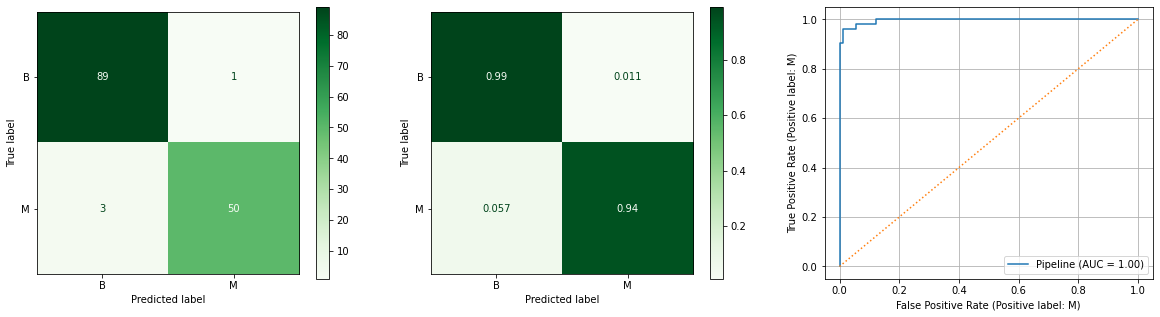

In [ ]:
# Evaluate GridSearch Object using function
evaluate_classification(best_logreg, X_test, y_test)

# SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE, SMOTENC

In [ ]:
pd.Series(y_train).value_counts()

B    267
M    159
Name: diagnosis, dtype: int64

In [ ]:
smote = SMOTE(sampling_strategy='auto')

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
pd.Series(y_train_smote).value_counts()

B    267
M    267
Name: diagnosis, dtype: int64

In [ ]:
smote_logreg = LogisticRegression(C=1e12)
smote_logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000000000000.0)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           B       0.00      0.00      0.00       267
           M       0.37      1.00      0.54       159

    accuracy                           0.37       426
   macro avg       0.19      0.50      0.27       426
weighted avg       0.14      0.37      0.20       426



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


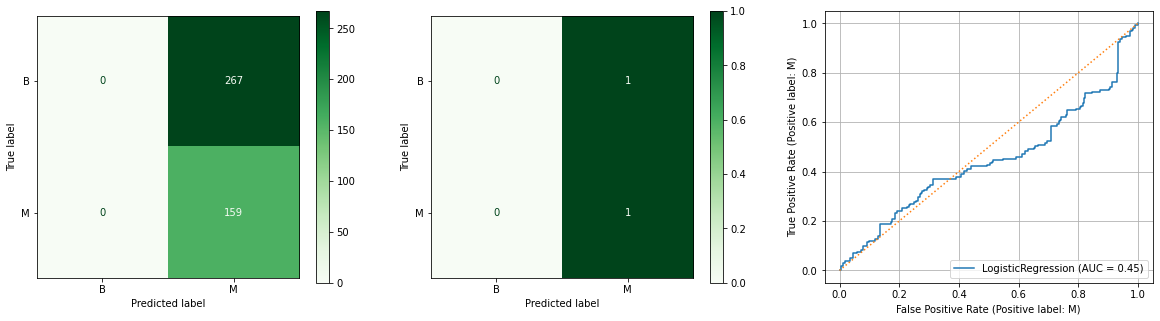

In [ ]:
evaluate_classification(smote_logreg, X_train, y_train)